In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from transformers import BartTokenizer

/workspace/cbqa-ood/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = "nq"
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")

train_df = pd.read_json(f"../data/{dataset}/{dataset}-train.jsonl", lines=True)
dev_df = pd.read_json(f"../data/{dataset}/{dataset}-dev.jsonl", lines=True)
merged_df = pd.read_parquet(f"../data/{dataset}/{dataset}-merged.parquet")

print(f"train: {len(train_df)}")
print(f"dev: {len(dev_df)}")
print(f"test: {len(merged_df)}")

for label in ["in", "near-ood", "far-ood"]:
    count = (merged_df["labels"] == label).sum()
    print(f"test {label}: {count}")


# Check actual token lengths
# train_df["answer_token_lengths"] = train_df["answers"].apply(
#     lambda answer_list: max(
#         len(tokenizer.encode(ans, add_special_tokens=False)) 
#         for ans in answer_list
#     )
# )

# print(f"Max token length: {train_df["answer_token_lengths"].max()}")
# print(f"Mean token length: {train_df["answer_token_lengths"].mean():.1f}")
# print(f"95th percentile: {train_df["answer_token_lengths"].quantile(0.95):.0f}")

train: 79168
dev: 8757
test: 1940
test in: 318
test near-ood: 315
test far-ood: 1307


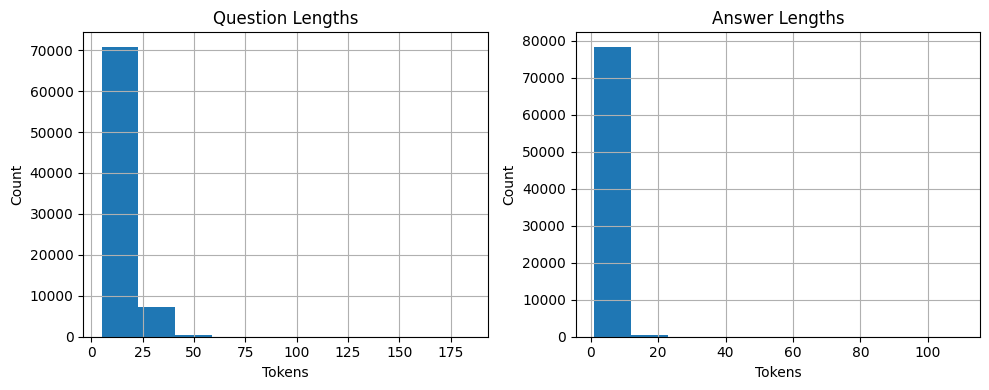

In [ ]:


fig, axes = plt.subplots(1, 2, figsize=(10, 4))
train_df["question"].apply(lambda q: len(q.split())).hist(ax=axes[0])
axes[0].set_title("Question Lengths")
axes[0].set_xlabel("Tokens")
axes[0].set_ylabel("Count")

train_df["answers"].apply(lambda a: len(a[0].split())).hist(ax=axes[1])
axes[1].set_title("Answer Lengths")
axes[1].set_xlabel("Tokens")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [20]:
print(f"99th percentile: {train_df["answer_token_lengths"].quantile(0.99):.0f}")

99th percentile: 31


In [4]:
# Check actual token lengths
train_df["question_token_lengths"] = train_df["question"].apply(
    lambda q: len(tokenizer.encode(q, add_special_tokens=False)))


In [6]:
print(f"Max token length: {train_df["question_token_lengths"].max()}")
print(f"Mean token length: {train_df["question_token_lengths"].mean():.1f}")
print(f"95th percentile: {train_df["question_token_lengths"].quantile(0.95):.0f}")

Max token length: 30
Mean token length: 10.4
95th percentile: 15
